# TTT4185 Machine learning for Speech technology

## Computer assignment 2: Classification using the Bayes Decision Rule and Support Vector Machines

This assignment assumes that the student has knowledge about the Bayes Decision Rule, maximum likelihood estimation and support vector machines.

In this assignment we will use `scikit-learn` (http://scikit-learn.org/stable/), which is a powerful and very popular Python toolkit for data analysis and machine learning, and `pandas` (https://pandas.pydata.org), which implements the all-powerful `DataFrame`.

We will also be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

### Problem 1

In this problem we will use the Bayes decision rule to classify vowels based on their formants. The formants have been extracted from the open database `VTR Formants database` (http://www.seas.ucla.edu/spapl/VTRFormants.html) created by Microsoft and UCLA.

(a) Download the files `Train.csv` and `Test.csv` from Blackboard, and load them into a `pandas` dataframe using the command `pd.read_csv`. Using the training data, create a single scatter plot of "F1" vs "F2" for the three vowels
- "ae" as in "bat"
- "ey" as in "bait"
- "ux" as in "boot"

Just eyeing the plots, discuss which classes will be hardest to classify correctly.

<IPython.core.display.Javascript object>


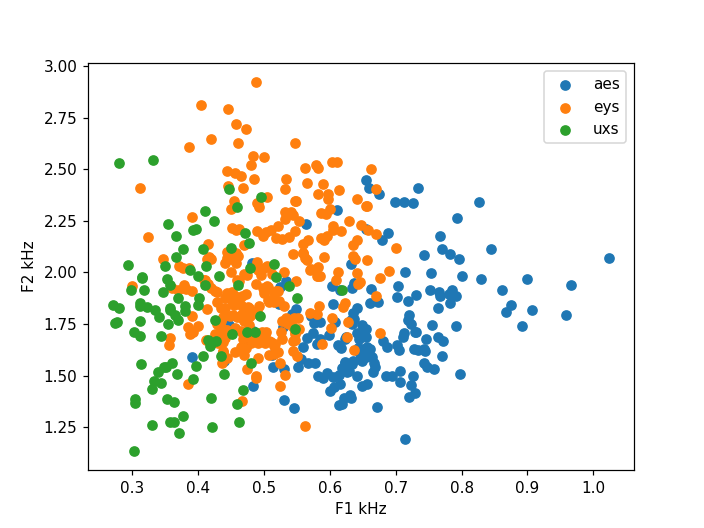

In [56]:
#!pip install pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib notebook

# Load data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

# Extract vowels
aes = train[train["Phoneme"] == 'ae']
eys = train[train["Phoneme"] == 'ey']
uxs = train[train["Phoneme"] == 'ux']

scatter = [aes, eys, uxs]
names = ['aes', 'eys', 'uxs']
# Plotting here
def F1vsF2ScatterPlot(plot_data, name):
    #name = [ k for k,v in locals().iteritems() if v == plot_data][0] #could use this instead of importing a name
    
    plt.xlabel('F1 kHz')
    plt.ylabel('F2 kHz')
    plt.scatter(plot_data['F1'],plot_data['F2'],label=name)
    #plt.legend(name)
    plt.legend()
    plt.show()

F1vsF2ScatterPlot(aes, 'aes')
F1vsF2ScatterPlot(eys, 'eys')
F1vsF2ScatterPlot(uxs, 'uxs')



The 'uxs' and the 'eys' could be difficult to classify, also the 'aes' and the 'eys' have a lot in common on the two first formants and therefor also be difficult to distinguish 

(b) Use the Bayes Decision Rule to create a classifier for the phonemes 'ae', 'ey' and 'ux' under the following constraints:
- The feature vector $x$ contains the first two formants, "F1" and "F2".
- The distribution of $x$ given a phoneme $c$, $P(x|c)$, is Gaussian.
- Use the maximum likelihood estimator to estimate the model parameters.

In [80]:
#!pip install scipy
import scipy.stats as ss 
#Things needed:
'''
    -Assuming all classes has the same covariance matrix
    -The mean of each class
    -covariance matrix

'''
def PreProcessing(training_data_set): #vowel you want from the training data, here it should only be ae,ea, ue
    #return train_data[train_data["Phoneme"] == vowel]
    models = []
    training_size = 0 
    for training_data in training_data_set:
        training_size += training_data.shape[0]
    for data in training_data_set:
        models.append({'mean': np.mean(data), 'cov': np.cov(data, rowvar=False), 'prior': data.shape[0]/training_size}) #this makes the Gaussian
    return models
    
    
    

def GaussianML(data):
    mean = np.mean(data)
    cov = np.cov(data, rowvar=False) #need to set rowvar to false since i dont want each row represents a variable, with observations in the columns
    return mean, cov

def Classifier(data, models): #this is seems to work now, but should be written much better, alot of unecessary computation i think
    num_classes = len(models)
    observations = len(data)
    prediction = []
    confusion_matrix = np.zeros((observations, num_classes))
    rvs = []
    priors = []
    
    for model in models:
        rvs.append(ss.multivariate_normal(mean=model['mean'], cov=model['cov']))
        priors.append(model['prior'])
    for i in range(len(data)):
        for j in range(len(data[i])):
            pred = []
            for model, rv in enumerate(rvs):
                pred.append(rv.pdf(data[i][j])*priors[model])
            prediction = np.argmax(pred)
            confusion_matrix[i][prediction] += 1
    return confusion_matrix
        
training_data =[aes[['F1','F2']],eys[['F1','F2']],uxs[['F1','F2']]]
aes_test = test[test["Phoneme"] == 'ae']
eys_test = test[test["Phoneme"] == 'ey']
uxs_test = test[test["Phoneme"] == 'ux']

testing_data =[aes_test[['F1','F2']].to_numpy(),eys_test[['F1','F2']].to_numpy(),uxs_test[['F1','F2']].to_numpy()]

models = PreProcessing(training_data)
#print(testing_data[0][0])
confusion_matrix = Classifier(testing_data, models)
print(confusion_matrix)
#predict(mean, cov)

def Classifier_alt(data, models): #this is not correct now, but a more compact version, could work
    num_classes = len(models)
    observations = len(data)
    confusion_matrix = np.zeros((observations, num_classes))
    predictions = []
    classes = []
    print(models)
    for i, model in enumerate(models):
        #print(f'i: {i}')
        #print(f'model: {model}')
        rvs = ss.multivariate_normal(mean=model['mean'], cov=model['cov'])
        predictions.append(rvs.pdf(data[i])*model['prior'])
        classes.append(model['class'])
        #print(predictions)
        #prediction = np.argmax(rvs.pdf(data[i])*model['prior'], axis=0)
        #print(f'prediciton {prediction}')
        #confusion_matrix[i,prediction] += 1
    predictions_prob = pd.DataFrame(predictions, columns=classes)
    
        
    return predictions_prob

    
    
    
    
    
    

     SpeakerID Gender Phoneme        F1        F2        F3        F4  \
115       elc0      F      ae  0.626849  2.040568  2.737875  4.225691   
286       elc0      F      ae  0.635120  2.129651  3.035465  4.324663   
296       elc0      F      ae  0.765164  1.928721  2.329302  4.138947   
378       dab0      M      ae  0.657672  1.512031  2.473496  3.353928   
530       dab0      M      ae  0.639403  2.078772  2.610199  3.651029   
...        ...    ...     ...       ...       ...       ...       ...   
6719      jln0      M      ae  0.871840  1.468683  2.460316  3.376118   
6860      pam0      M      ae  0.652087  1.519256  2.211460  3.977117   
6978      pam0      M      ae  0.673218  1.611651  2.372237  3.898877   
7108      pam0      M      ae  0.708950  1.390807  2.111469  4.040951   
7113      pam0      M      ae  0.651769  1.622842  2.485576  4.106205   

            B1        B2        B3        B4  
115   0.163549  0.312099  0.381565  0.419437  
286   0.191081  0.352319  0.3

(c) To visualize the classes models and the classifier created in (b), plot the contours for each Gaussian distribution in the model, that is the class conditional likelihoods $P(x|c)$, by using the following function.

In [58]:
#import scipy.stats
#def plotGaussian(models, colors, ax):
def ScatterPlot(plot_data, name, ax, color):
    #name = [ k for k,v in locals().iteritems() if v == plot_data][0] #could use this instead of importing a name
    
    #ax.xlabel('F1 kHz')
    #ax.ylabel('F2 kHz')
    ax.scatter(plot_data['F1'],plot_data['F2'],label=name, color=color)
    #plt.legend(name)
    ax.legend()
    
    #plt.show()
    
def plotGaussian(mean, cov, color, ax):

    """ 
        Creates a contour plot for a bi-variate normal distribution
        
        mean: numpy array 2x1 with mean vector
        cov: numpy array 2x2 with covarince matrix
        color: name of color for the plot (see https://matplotlib.org/stable/gallery/color/named_colors.html)
        ax: axis handle where the plot is drawn (can for example be returned by plt.gca() or plt.subplots())
    """
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x, y = np.mgrid[xlim[0]:xlim[1]:(xlim[1]-xlim[0])/500.0, ylim[0]:ylim[1]:(ylim[1]-ylim[0])/500.0]
    xy = np.dstack((x, y))
    mvn = ss.multivariate_normal(mean, cov)
    lik = mvn.pdf(xy)
    ax.contour(x,y,lik,colors=color)
    plt.show()
#     for i, model in models:
#         mvn = scipy.stats.multivariate_normal(model['mean'], model['cov'])
#         lik = mvn.pdf(xy)
#         ax.contour(x,y,lik,colors=colors[i])
    

<IPython.core.display.Javascript object>


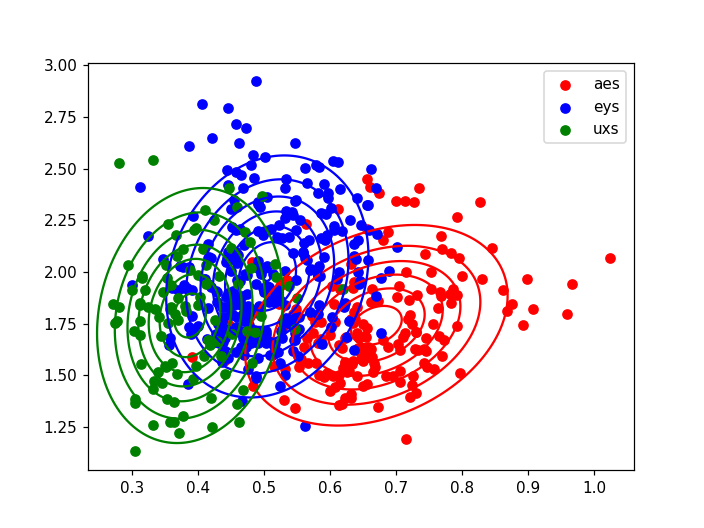

In [59]:
colors = ['r','b', 'g']
fig, ax = plt.subplots()
#Seems that I have to plot them in seperate loops so that the ax.get_()lim gets the limit of the entire plot. Doesnt look nice do



for idx, data in enumerate(scatter):
    ScatterPlot(data, names[idx], ax, colors[idx])

for i, model in enumerate(models):
    #ScatterPlot(scatter[i], names[i], ax, colors[i])
    plotGaussian(model['mean'], model['cov'],colors[i], ax)
 

*Try:* Plot the decision regions for the Bayesian classifier. Tips: Calculate the posterior for each class, use the `numpy.argmax` function to get the decision regions, and `matplotlib.pyplot.contourf` to plot them.

<IPython.core.display.Javascript object>


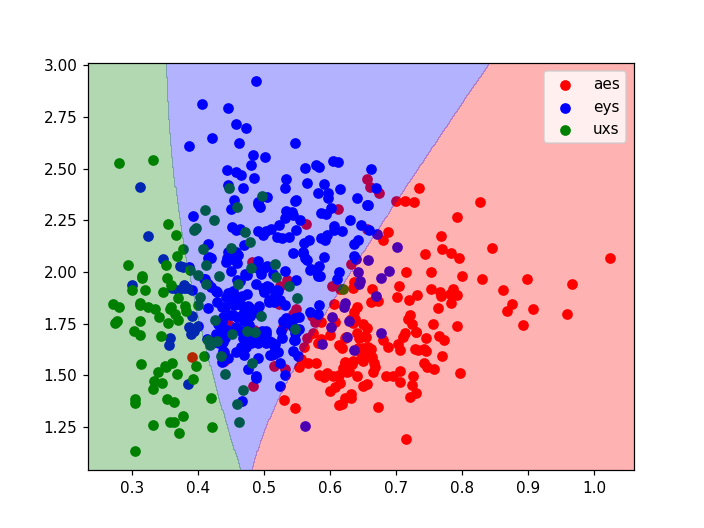

In [60]:
def plot_decision_region(models, colors, ax):
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x, y = np.mgrid[xlim[0]:xlim[1]:(xlim[1]-xlim[0])/500.0, ylim[0]:ylim[1]:(ylim[1]-ylim[0])/500.0]
    xy = np.dstack((x, y))
    
    num_models = len(models)
    #coordinate matrices
    X1, X2 = x.shape
    posterios = np.zeros((X1, X2, num_models))
    
    for idx, model in enumerate(models):
        mvn = ss.multivariate_normal(model['mean'], model['cov'])
        posterios[:, :, idx] = mvn.pdf(xy)*model['prior']
    regions = posterios.argmax(axis=2)
    ax.contourf(x, y, regions, levels=np.arange(-0.5, num_models), colors=colors, alpha= 0.3)
    return regions

colors = ['r','b', 'g']
fig, ax1 = plt.subplots()
#Seems that I have to plot them in seperate loops so that the ax.get_()lim gets the limit of the entire plot. Doesnt look nice do



for idx, data in enumerate(scatter):
    ScatterPlot(data, names[idx], ax1, colors[idx])

regions = plot_decision_region(models, colors, ax1)

(d) Test your classifier on the 'ae', 'ey' and 'ux' phonemes from the test set and present your results in a _confusion matrix_, that is, a table where you see how many times 'ae' was correctly classified, how many times it was wrongly classified as 'ey' and so on.

<IPython.core.display.Javascript object>


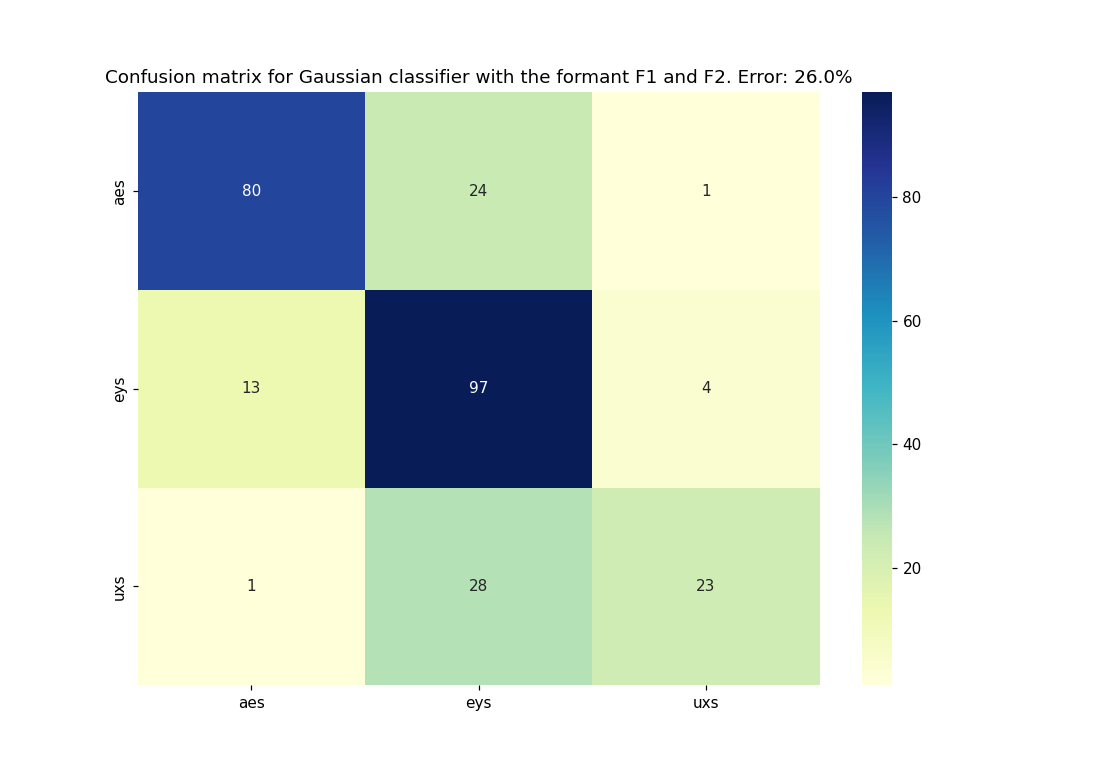

In [61]:
#!pip install seaborn
import seaborn as sn
def plot_confusion_matrix(data, class_names, title=''):
        dia_sum = 0
        for i in range(len(data)):
            dia_sum += data[i, i]
        error = 1 - dia_sum / np.sum(data)
        error = round(error,2)*100
        df_cm = pd.DataFrame(data, index = [i for i in class_names],
                  columns = [i for i in class_names])
        plt.figure(figsize = (10,7))
        sn.heatmap(df_cm, annot=True, cmap="YlGnBu")
        plt.title(f'{title}. Error: {error}%')
        plt.show()
        #plt.clf()
        #plt.close()
class_names = np.array(['aes','eys','uxs'])
plot_confusion_matrix(confusion_matrix, class_names,title='Confusion matrix for Gaussian classifier with the formant F1 and F2')

(e) Extend your classifier to include the features "F1"-"F4" and compare the results with those in (d). Finally use all available information "F1"-"F4" and "B1-B4". How does the performance of this classifier compare with the simpler classifiers using fewer features?

This is for "F1"-"F4"

[[82. 21.  2.]
 [13. 98.  3.]
 [ 2. 25. 25.]]


<IPython.core.display.Javascript object>


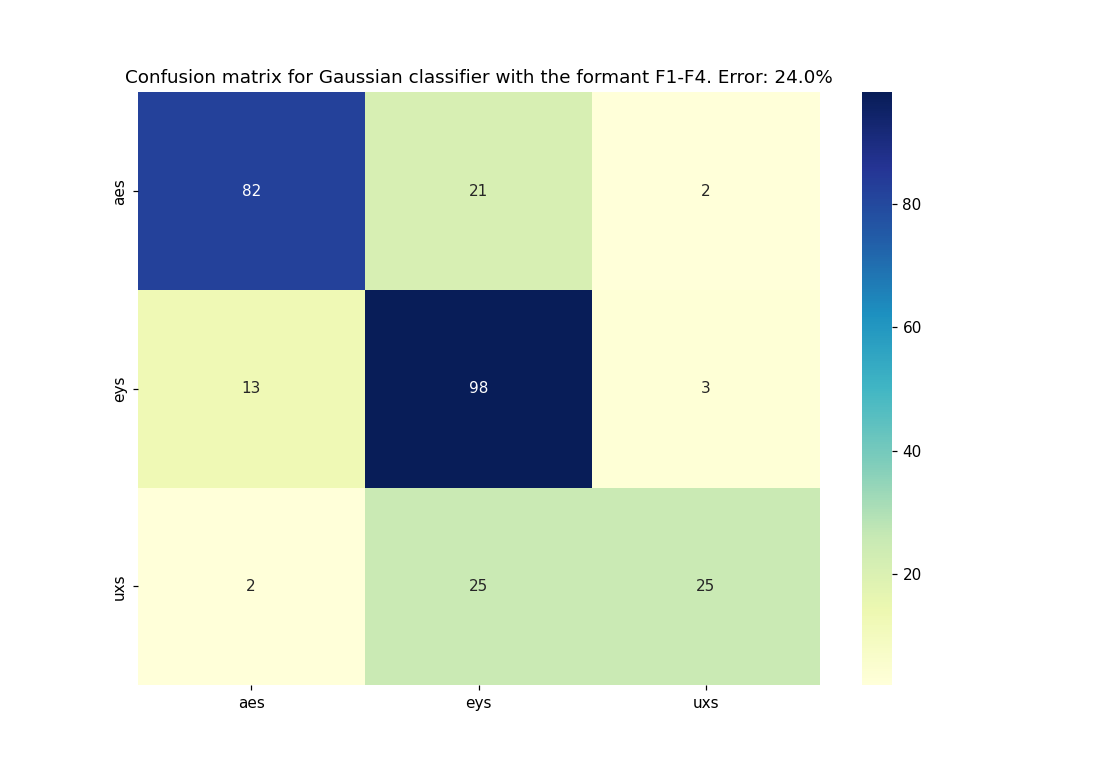

In [62]:

training_data_2 =[aes[['F1','F2','F3','F4']],eys[['F1','F2','F3','F4']],uxs[['F1','F2','F3','F4']]]

testing_data_2 =[aes_test[['F1','F2','F3','F4']].to_numpy(),eys_test[['F1','F2','F3','F4']].to_numpy(),uxs_test[['F1','F2','F3','F4']].to_numpy()]

models_2 = PreProcessing(training_data_2)
#print(testing_data[0][0])
confusion_matrix_2 = Classifier(testing_data_2, models_2)
print(confusion_matrix_2)
plot_confusion_matrix(confusion_matrix_2, class_names, title='Confusion matrix for Gaussian classifier with the formant F1-F4')

This is for all the data

[[82. 23.  0.]
 [13. 90. 11.]
 [ 3. 28. 21.]]


<IPython.core.display.Javascript object>


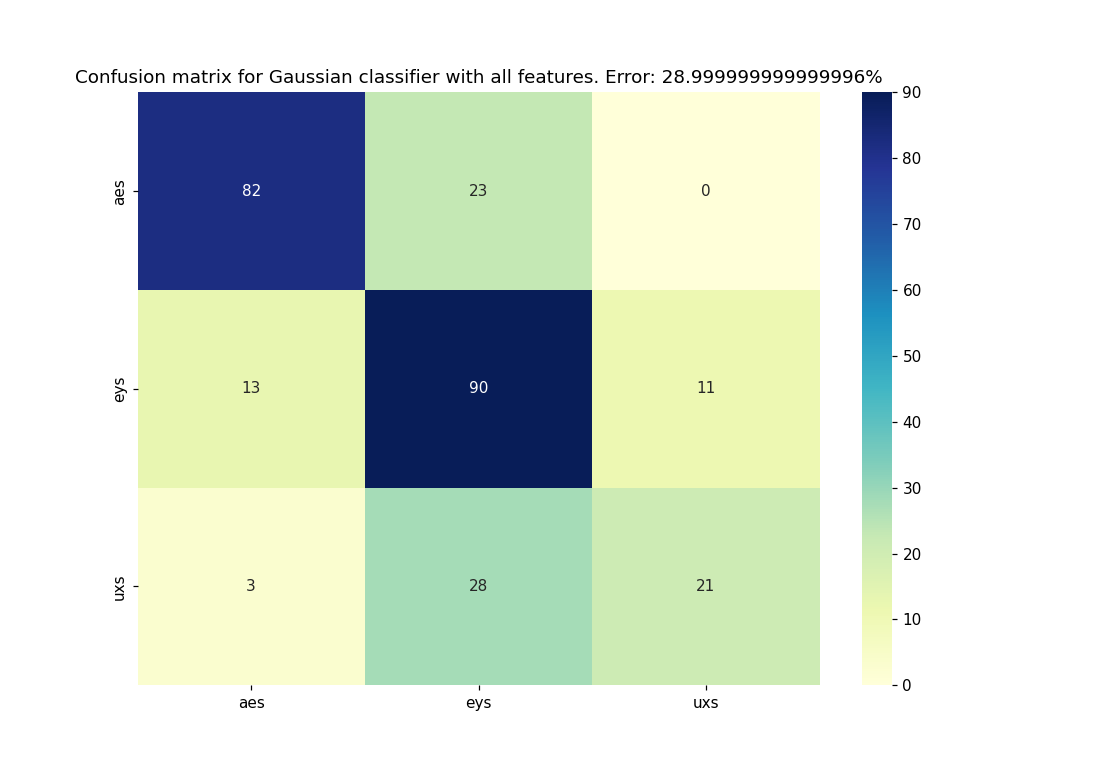

In [63]:
training_data_3 =[aes[['F1','F2','F3','F4','B1' ,'B2' ,'B3','B4']],eys[['F1','F2','F3','F4','B1' ,'B2' ,'B3','B4']],uxs[['F1','F2','F3','F4','B1' ,'B2' ,'B3','B4']]]

testing_data_3 =[aes_test[['F1','F2','F3','F4','B1' ,'B2' ,'B3','B4']].to_numpy(),eys_test[['F1','F2','F3','F4','B1' ,'B2' ,'B3','B4']].to_numpy(),uxs_test[['F1','F2','F3','F4','B1' ,'B2' ,'B3','B4']].to_numpy()]

models_3 = PreProcessing(training_data_3)
#print(testing_data[0][0])
confusion_matrix_3 = Classifier(testing_data_3, models_3)
print(confusion_matrix_3)
plot_confusion_matrix(confusion_matrix_3, class_names, title='Confusion matrix for Gaussian classifier with all features')

(f) We want to make the model slightly more powerful by modeling the feature vector conditional on both the vowel and gender of speaker, that is $P(x|g,c)$, where $g$ is the gender of the speaker and $c$ is the phoneme label. Show how these models can be used for phoneme classification using marginalization over the gender.

Assume that $P(x|g,c)$ is a multivariate Gaussian and compute the maximum likelihood estimates for the models. Compare the result on the test set with the results in (e).

<IPython.core.display.Javascript object>


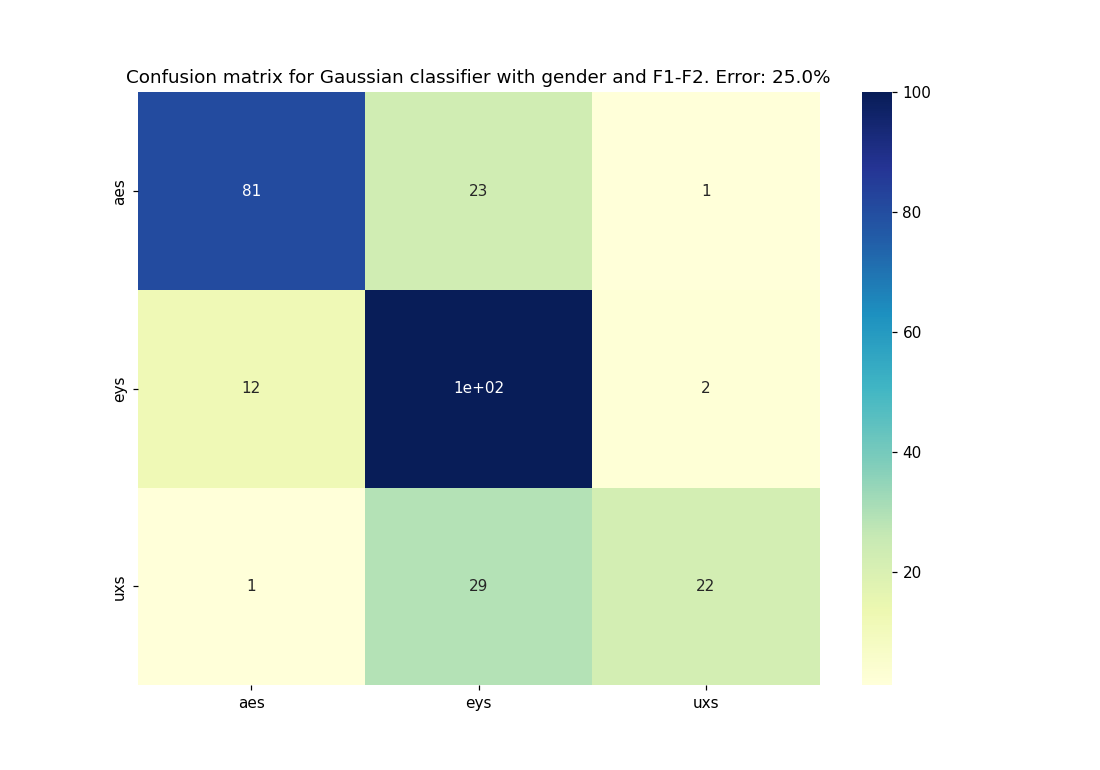

<IPython.core.display.Javascript object>


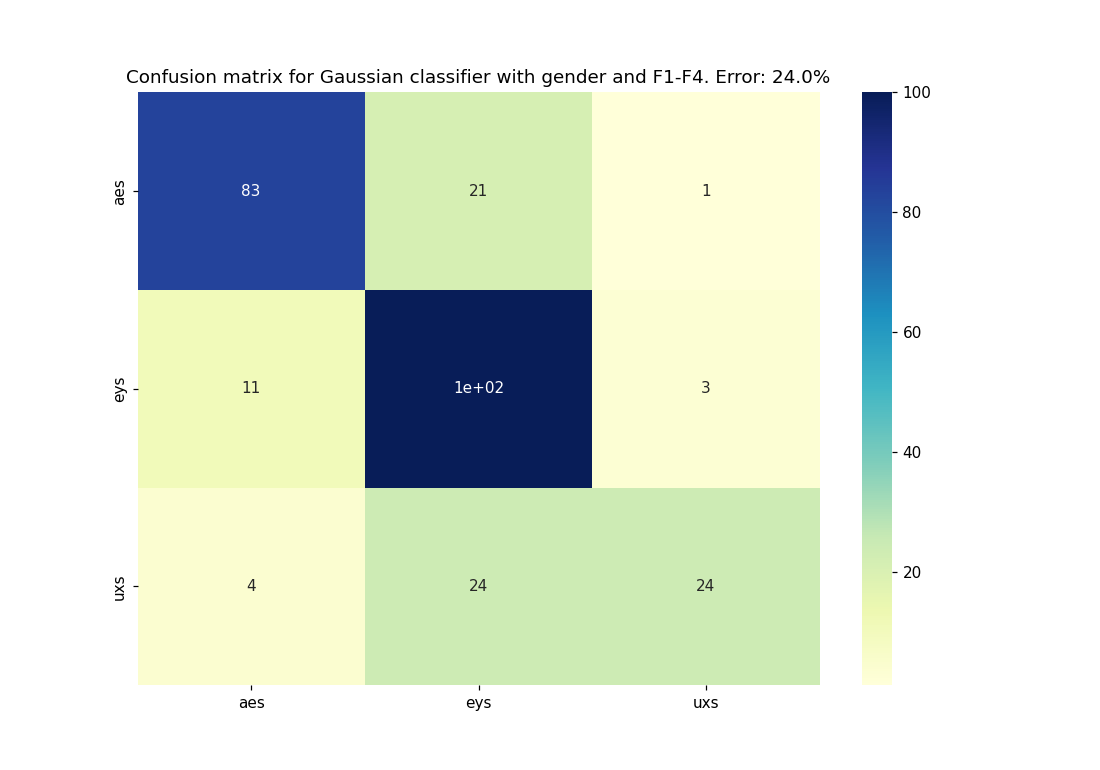

<IPython.core.display.Javascript object>


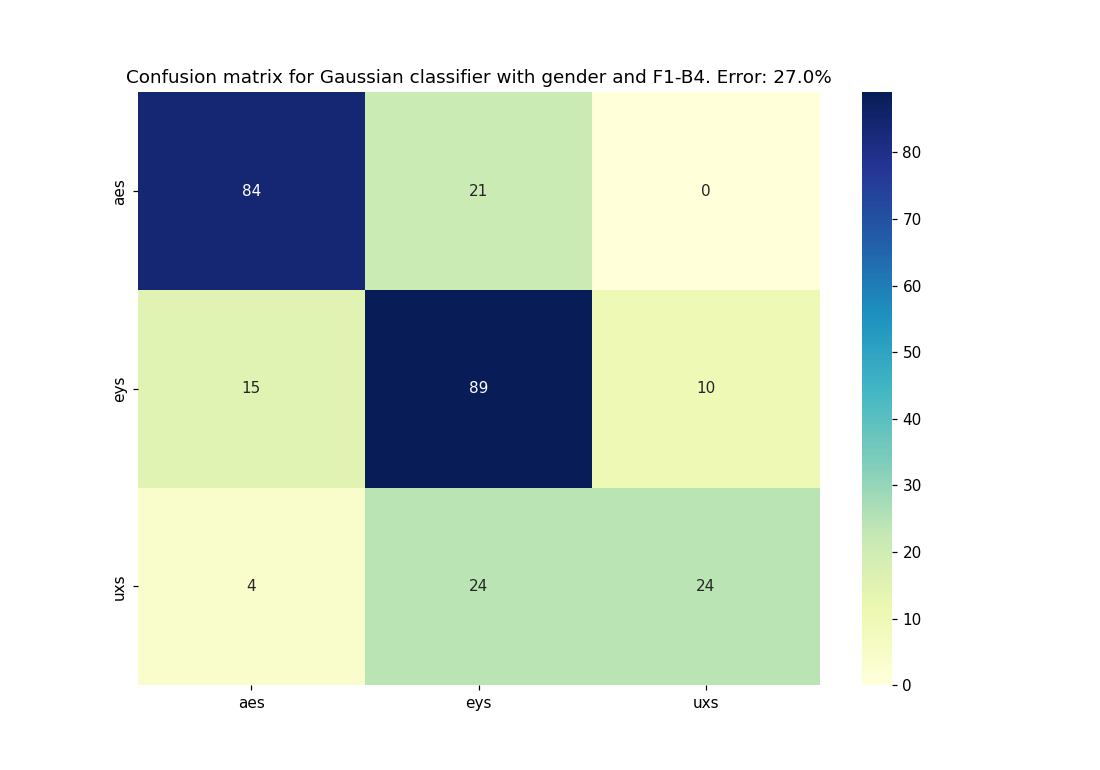

In [64]:
'''
TODO:
    - split the dataset into the vowels with their respective gender. So we will have aes[Female] and aes[male] etc
    - make new priors with respect to the gender
    - when checking with the model, we sum the likelyhood of each gender per vowel and then take argmax
    
Possible solutions:
    - Using a 2d numpy array and use the preprossing with a doble for loop
    - Make a dictionary
    - try and use some pandas magic

Solution:
    The solution is working but it is not nice, 
    will try and find time to improve it and remove alot of unecessary steps and loops.
    Now I take advantage of that I know the shapes of the data
    Also I should make it easier to run and test the code, so that I dont have 3 examples of testing data etc
    
'''
def PreProcessing_gender(training_data_set, features): #vowel you want from the training data, here it should only be ae,ea, ue
    #return train_data[train_data["Phoneme"] == vowel]
    models = []
    gender = ''
    training_size = 0 
    
    for training_data in training_data_set: #this is totally unecessary, could have just stored it as a global variable
        for phoneme in training_data:
            training_size += phoneme.shape[0]
    for phoneme in training_data_set:
        for gender_data in phoneme:
            vowel = gender_data['Phoneme'].values[0]
            gender = gender_data['Gender'].values[0]
            data = gender_data[features]
            models.append({
                'mean': np.mean(data),
                'cov': np.cov(data, rowvar=False),
                'prior': data.shape[0]/training_size,
                'gender': gender,
                'phoneme': vowel }
            )
    return models


def Classifier_gender(data, models): #this is seems to work now, but should be written much better, alot of unecessary computation i think
    #num_classes = len(models)
    observations = len(data)
    prediction = []
    confusion_matrix = np.zeros((observations, observations))
    rvs = []
    priors = []
    
    for model in models:
        rvs.append(ss.multivariate_normal(mean=model['mean'], cov=model['cov']))
        priors.append(model['prior'])
    
    for i in range(len(data)):
        for j in range(len(data[i])):
            pred = []
            pred_tot = []
                
            for idx, rv in enumerate(rvs):
                pred.append(rv.pdf(data[i][j])*priors[idx])
            for x in range(1,len(pred),2):
                pred_tot.append(pred[x-1]+pred[x])
            prediction = np.argmax(pred_tot)

            confusion_matrix[i][prediction] += 1
            
    return confusion_matrix



aes_f = aes[aes["Gender"] == 'F']
aes_m = aes[aes["Gender"] == 'M']
eys_f = eys[eys["Gender"] == 'F']
eys_m = eys[eys["Gender"] == 'M']
uxs_f = uxs[uxs["Gender"] == 'F']
uxs_m = uxs[uxs["Gender"] == 'M']

training_set_mod = np.array([[aes_f,aes_m], [eys_f,eys_m], [uxs_f,uxs_m]])
testing_data_f1_f2 =[aes_test[['F1','F2']].to_numpy(),eys_test[['F1','F2']].to_numpy(),uxs_test[['F1','F2']].to_numpy()]


models_f1_f2 = PreProcessing_gender(training_set_mod, ['F1','F2'])
confusion_matrix_gender_f1_f2 = Classifier_gender(testing_data_f1_f2, models_f1_f2)
plot_confusion_matrix(confusion_matrix_gender_f1_f2, class_names, title='Confusion matrix for Gaussian classifier with gender and F1-F2')

testing_data_f1_f4 =[aes_test[['F1','F2','F3','F4']].to_numpy(),eys_test[['F1','F2','F3','F4']].to_numpy(),uxs_test[['F1','F2','F3','F4']].to_numpy()]
models_f1_f4 = PreProcessing_gender(training_set_mod, ['F1','F2','F3','F4'])
confusion_matrix_gender_f1_f4 = Classifier_gender(testing_data_f1_f4, models_f1_f4)
plot_confusion_matrix(confusion_matrix_gender_f1_f4, class_names, title='Confusion matrix for Gaussian classifier with gender and F1-F4')


testing_data_f1_b4 =[aes_test[['F1','F2','F3','F4','B1' ,'B2' ,'B3','B4']].to_numpy(),eys_test[['F1','F2','F3','F4','B1' ,'B2' ,'B3','B4']].to_numpy(),uxs_test[['F1','F2','F3','F4','B1' ,'B2' ,'B3','B4']].to_numpy()]
models_f1_b4 = PreProcessing_gender(training_set_mod, ['F1','F2','F3','F4','B1' ,'B2' ,'B3','B4'])
confusion_matrix_gender_f1_b4 = Classifier_gender(testing_data_f1_b4, models_f1_b4)
plot_confusion_matrix(confusion_matrix_gender_f1_b4, class_names, title='Confusion matrix for Gaussian classifier with gender and F1-B4')


            

(g) When using Gaussian classifiers we often avoid computing the entire covariance matrix, but instead we only use the diagonal of the matrix. Repeat the results in (f) using only diagonal covariance matrices and compare the results.

<IPython.core.display.Javascript object>


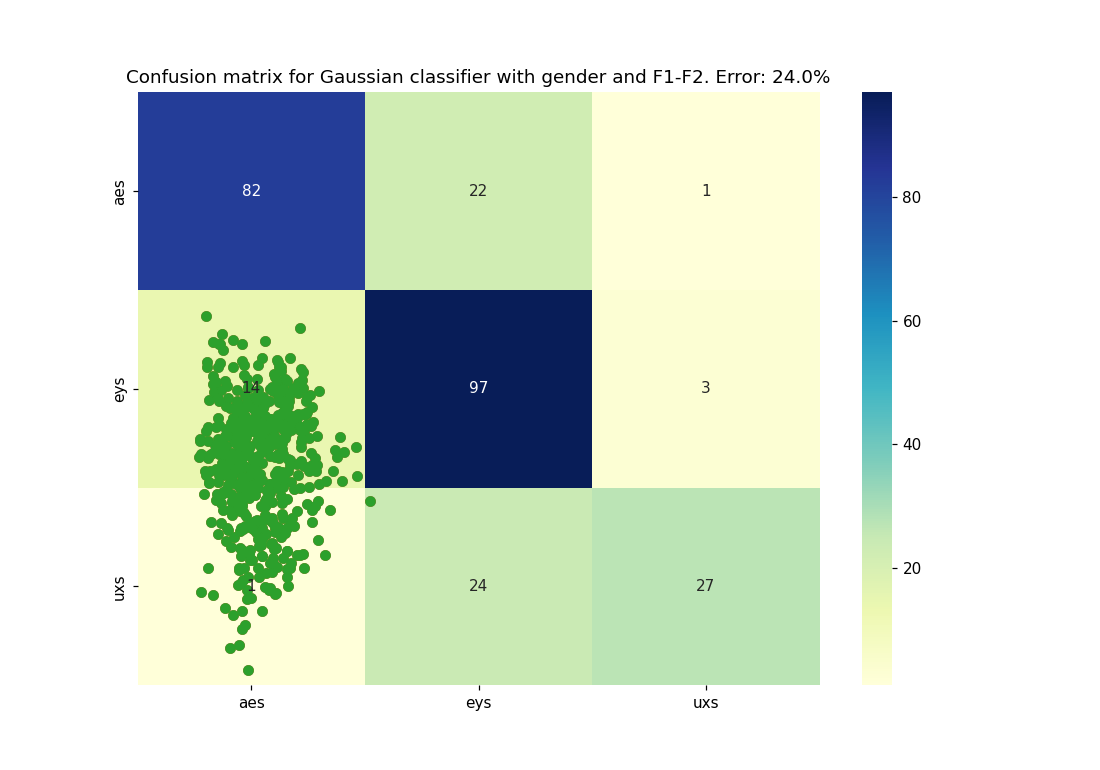

In [65]:

def PreProcessing_gender_fullcov(training_data_set, features, id_mat): #vowel you want from the training data, here it should only be ae,ea, ue
    #return train_data[train_data["Phoneme"] == vowel]
    models = []
    gender = ''
    training_size = 0 
    
    for training_data in training_data_set: #this is totally unecessary, could have just stored it as a global variable
        for phoneme in training_data:
            training_size += phoneme.shape[0]
    for phoneme in training_data_set:
        for gender_data in phoneme:
            vowel = gender_data['Phoneme'].values[0]
            gender = gender_data['Gender'].values[0]
            data = gender_data[features]
            models.append({
                'mean': np.mean(data),
                'cov': np.cov(data, rowvar=False)*id_mat,
                'prior': data.shape[0]/training_size,
                'gender': gender,
                'phoneme': vowel }
            )
    return models
num_features = 4
id_mat = np.eye(num_features)
models_f1_f2_full = PreProcessing_gender_fullcov(training_set_mod, ['F1','F2','F3','F4'], id_mat)
confusion_matrix_gender_f1_f2_fullcov = Classifier_gender(testing_data_f1_f4, models_f1_f2_full)
plot_confusion_matrix(confusion_matrix_gender_f1_f2_fullcov, class_names, title='Confusion matrix for Gaussian classifier with gender and F1-F2')


### Problem 2

In this problem we use the support vector machine (SVM) to build classifiers. We use the same dataset as in Problem 1. It is up to you to select which features to use.

We use the function `sklearn.svm.SVC` from `scikit-learn` in this problem. First you need to get your data on the format that `SVC` expects, which is a matrix where every row is a feature vector, and a list of integer labels corresponding to each row. We suggest using "ae" = 0, "ey" = 1 and "ux" = 2.

An example on how to use the `SVC` is given in http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC. In short, we do the following (for a linear kernel):
- Instantiate an SVC object: `cls = SVC(kernel='linear')`
- Train the SVM using the feature vector matrix `train_X`, and label vector `train_Y`: `cls.fit(train_X, train_Y)`
- Predict labels on the test set `Test_X` using: `cls.predict(Test_X)`

You can use or adapt the following functions to visualize the SVM decision regions and support vectors in 2D.

In [134]:
#!pip install sklearn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

#there is something wrong with these functions, saw the fix on blackboard but that didnt work 

def Plot_SVM_decision_regions(clf,data,labels):
    '''
    This function is for plotting the decision area of SVM
    
    Args:
    - clf: SVM model
    - data: Data with two features
    - labels: Corresponding labels of the data
    '''
    phonemes = np.array(["ae","ey","ux"])
    x_min, x_max = data[:,0].min() - 0.2, data[:,0].max() + 0.2
    y_min, y_max = data[:,1].min() - 0.2, data[:,1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.002),np.arange(y_min, y_max, 0.002))
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(phonemes)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = label_encoder.transform(Z)
    Z = Z.reshape(xx.shape)
    #Plotting
    plt.figure(figsize=(10,6))
    sns.scatterplot(data[:,0],data[:,1],hue=labels)
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.2)
    plt.legend()
    plt.title('Decision Area of SVM')
    plt.show()

def Plot_Support_Vectors(clf,data):
    '''
    This function is for plotting the support vectors of the SVM model
    
    Args:
    - clf: SVM model
    - data: Data with two features
    '''
    phonemes = np.array(["ae","ey","ux"])
    x_min, x_max = data[:,0].min() - 0.2, data[:,0].max() + 0.2
    y_min, y_max = data[:,1].min() - 0.2, data[:,1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.002),np.arange(y_min, y_max, 0.002))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(phonemes)
    Z = label_encoder.transform(Z)
    Z = Z.reshape(xx.shape)
    #Plotting
    plt.figure(figsize=(10,6))
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], c='k',alpha=0.4,label='support vector')
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.2)
    plt.legend()
    plt.title('Support Vectors')
    plt.show()

In [129]:
def sklearnPlotSupportVector(clf, data):
    
    x_min, x_max = data[:,0].min() - 0.2, data[:,0].max() + 0.2
    y_min, y_max = data[:,1].min() - 0.2, data[:,1].max() + 0.2
    
    decision_function = clf.decision_function(data)
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = data[support_vector_indices]

    plt.scatter(data[:, 0], data[:, 1], cmap=plt.cm.ocean)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.002),np.arange(y_min, y_max, 0.002))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')

In [101]:
#fixing test and train data, a bit better method than before, but still not nice
aes_train = train[train['Phoneme'] == 'ae'].loc[:,['F1','F2','F3','F4']]
eys_train = train[train['Phoneme'] == 'ey'].loc[:,['F1','F2','F3','F4']]
uxs_train = train[train['Phoneme'] == 'ux'].loc[:,['F1','F2','F3','F4']]
train_phonemes = np.vstack((aes_train, eys_train, uxs_train))

aes_test_feat = test[test['Phoneme'] == 'ae'].loc[:,["F1","F2","F3","F4"]]
eys_test_feat = test[test['Phoneme'] == 'ey'].loc[:,["F1","F2","F3","F4"]]
uxs_test_feat = test[test['Phoneme'] == 'ux'].loc[:,["F1","F2","F3","F4"]]
test_phonemes = np.vstack((aes_test_feat, eys_test_feat, uxs_test_feat))

#labels


#Trainlabels = np.array(aes_train.shape[0]*["ae"] + eys_train.shape[0]*["ey"] + uxs_train.shape[0]*["ux"])
#print(type(aes_train.shape[0]*["ae"]))
train_labels = np.concatenate((aes['Phoneme'].values,eys['Phoneme'].values,uxs['Phoneme'].values))

test_labels = np.concatenate((aes_test['Phoneme'].values,eys_test['Phoneme'].values,uxs_test['Phoneme'].values))


(a) Create a linear SVM with different penalty terms $C=\{0.1, 1, 10\}$ and compare with the results in Problem 1.

<IPython.core.display.Javascript object>


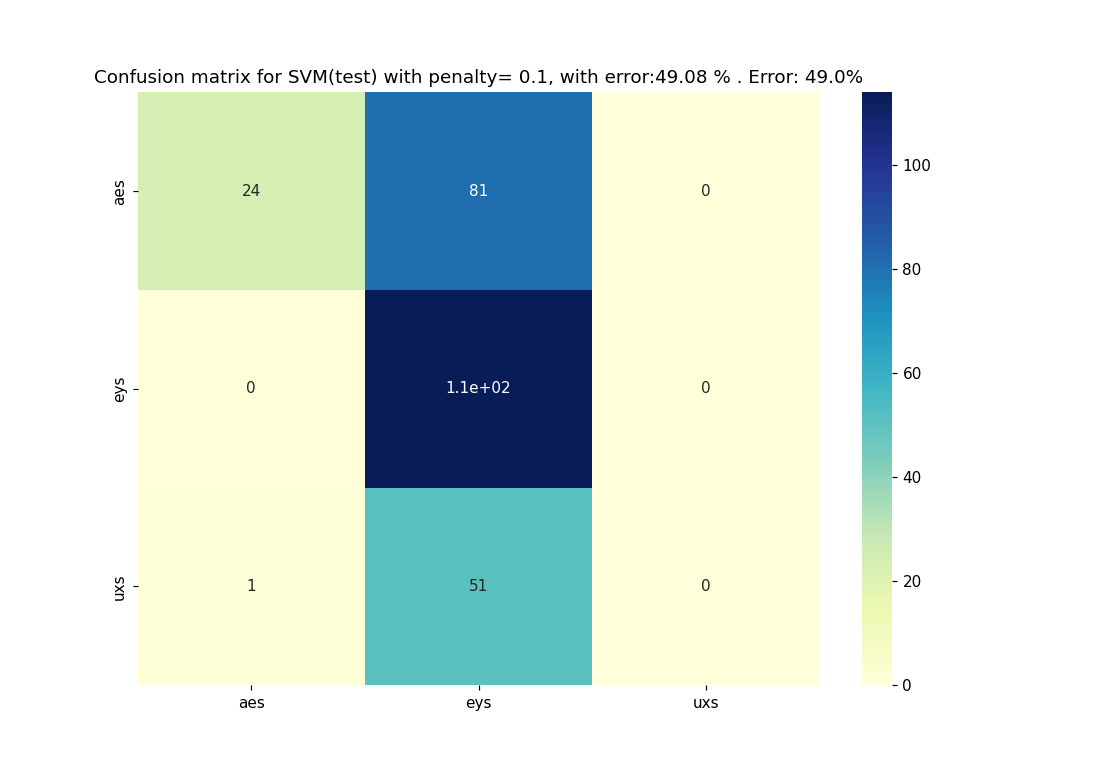

<IPython.core.display.Javascript object>


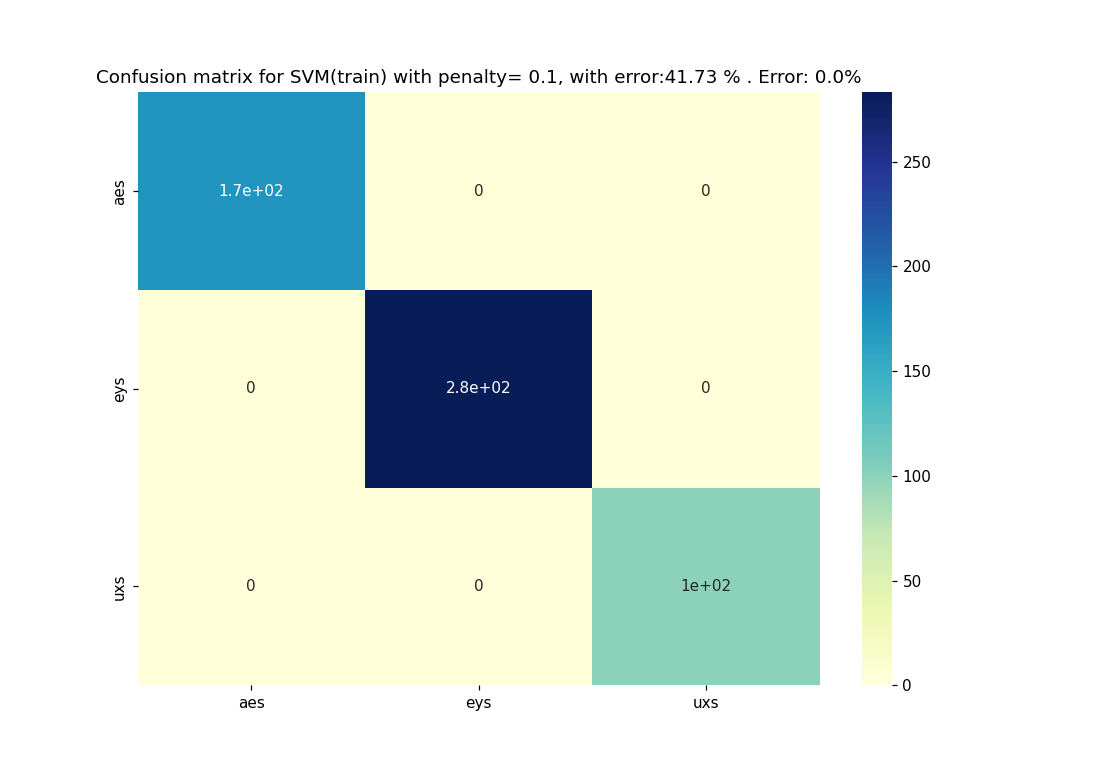

<IPython.core.display.Javascript object>


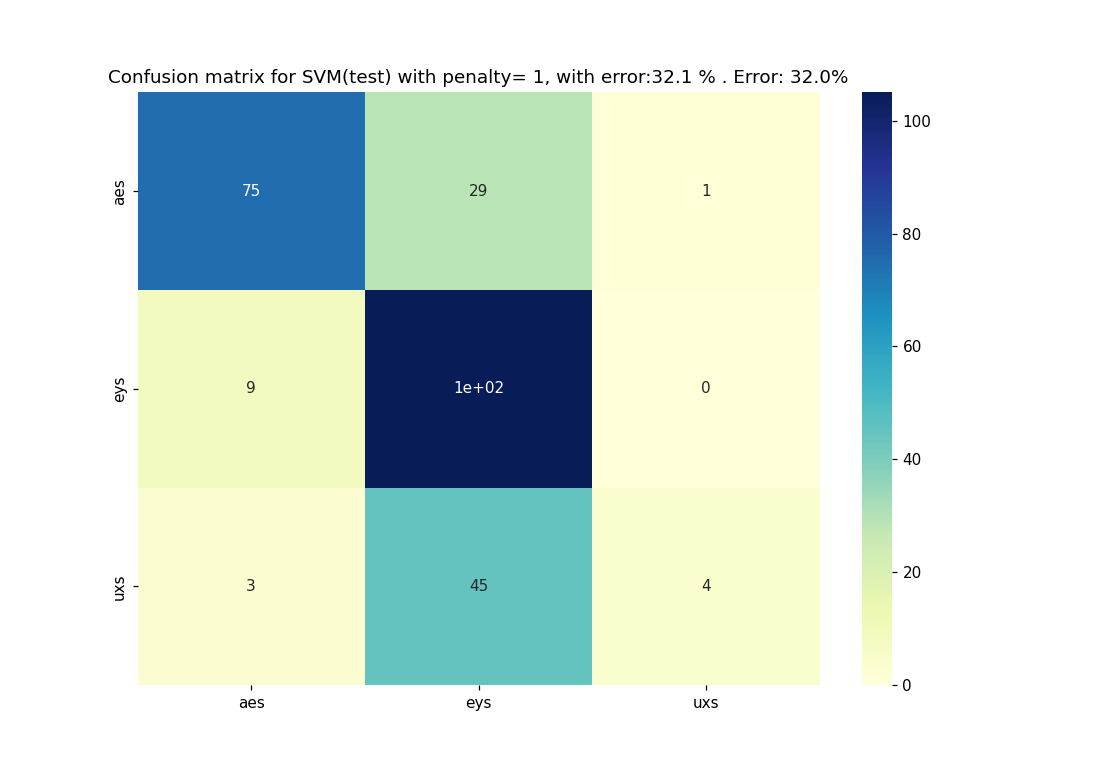

<IPython.core.display.Javascript object>


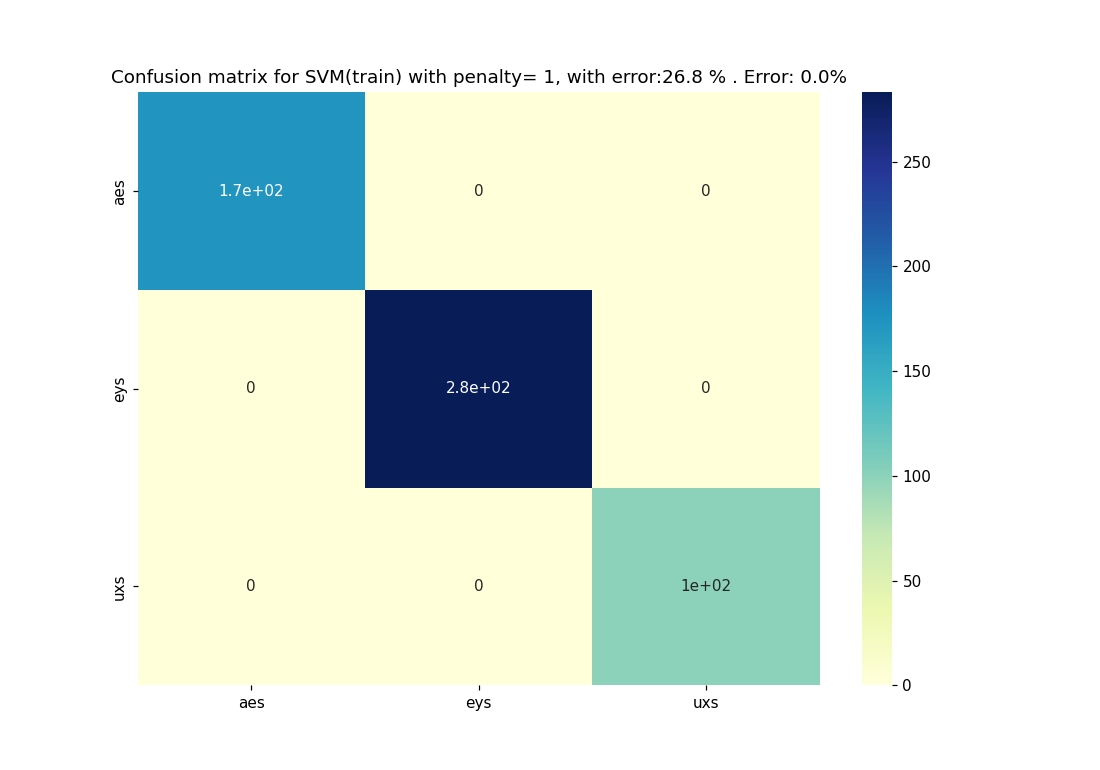

<IPython.core.display.Javascript object>


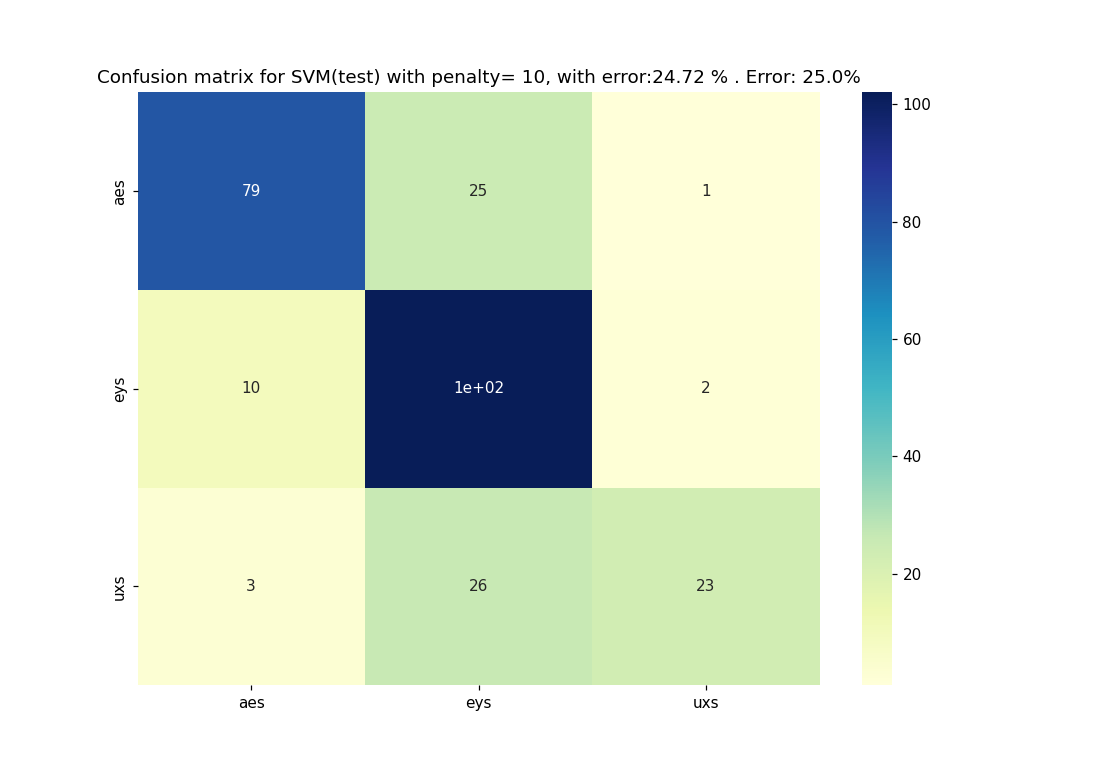

<IPython.core.display.Javascript object>


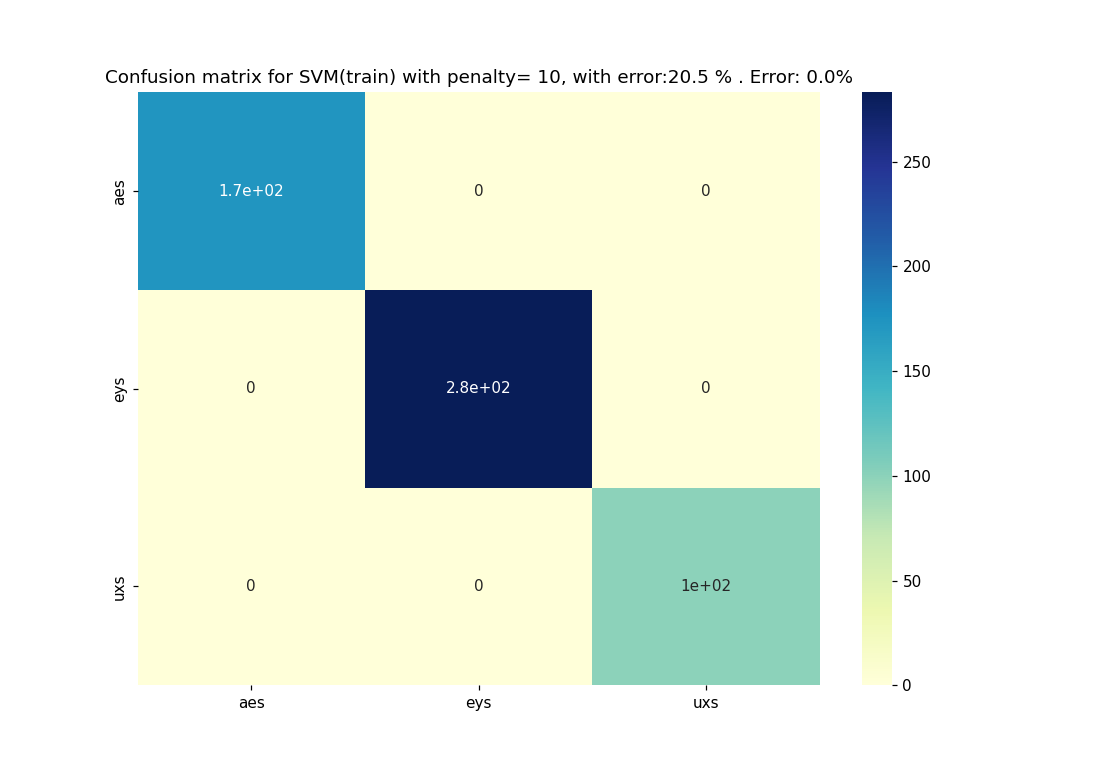

SVC(C=10, kernel='linear')

In [147]:
 
def SVM(train, test, true_trainlabel, true_testlabel, penalties, classes, kernel='linear', plot_cm=True, plot_dec_sup=False):
    for p in penalties:
        clf = svm.SVC(C=p, kernel=kernel)
        clf.fit(train, true_trainlabel)
        train_labels_pred = clf.predict(train)
        test_labels_pred = clf.predict(test)

        test_error = (np.sum(true_testlabel != test_labels_pred))*100/(len(test_labels_pred))
        train_error = (np.sum(true_trainlabel != train_labels_pred))*100/(len(train_labels_pred))
        cm_test = metrics.confusion_matrix(y_true=true_testlabel, y_pred=test_labels_pred)
        cm_train = metrics.confusion_matrix(y_true=true_trainlabel, y_pred=train_labels)
        
        if plot_cm:
            plot_confusion_matrix(cm_test, class_names, title=f'Confusion matrix for SVM(test) with penalty= {p}, with error:{round(test_error,2)} % ' )
            plot_confusion_matrix(cm_train, class_names, title=f'Confusion matrix for SVM(train) with penalty= {p}, with error:{round(train_error,2)} % ' )
        if plot_dec_sup:
            Plot_SVM_decision_regions(clf,train,true_trainlabel)
            Plot_Support_Vectors(clf,train)
            
    return clf

C = [0.1,1,10]
SVM(train_phonemes, test_phonemes, train_labels, test_labels, C, class_names)   

<IPython.core.display.Javascript object>


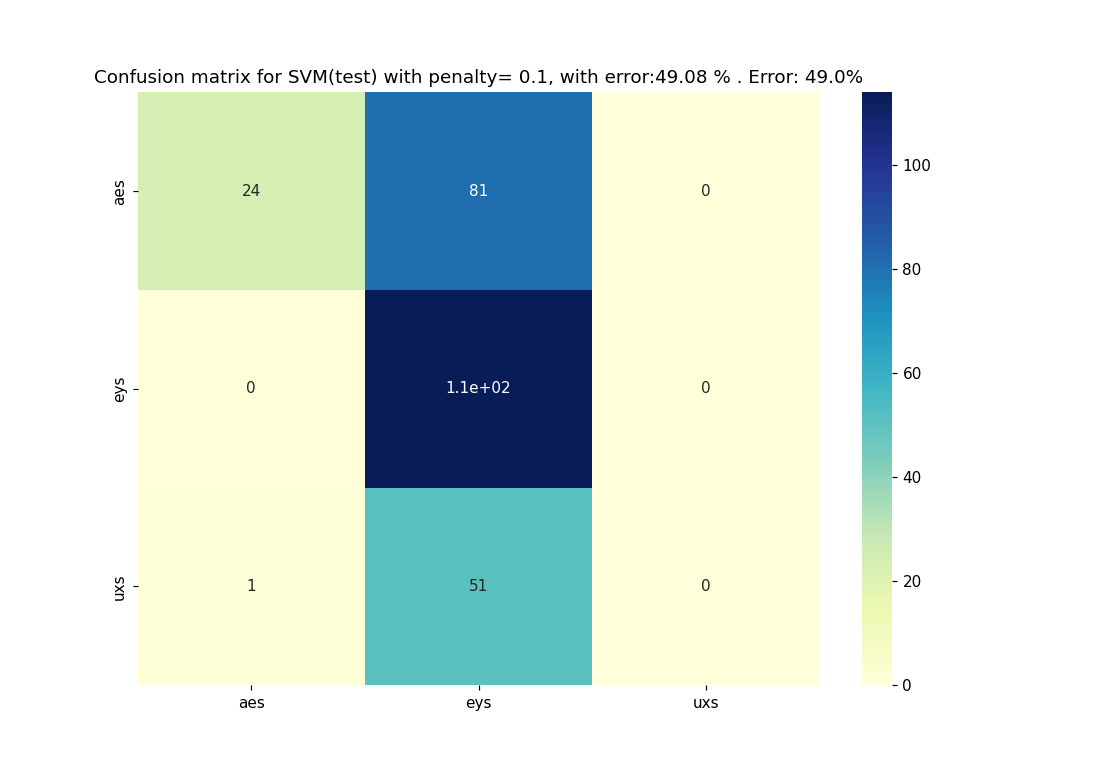

<IPython.core.display.Javascript object>


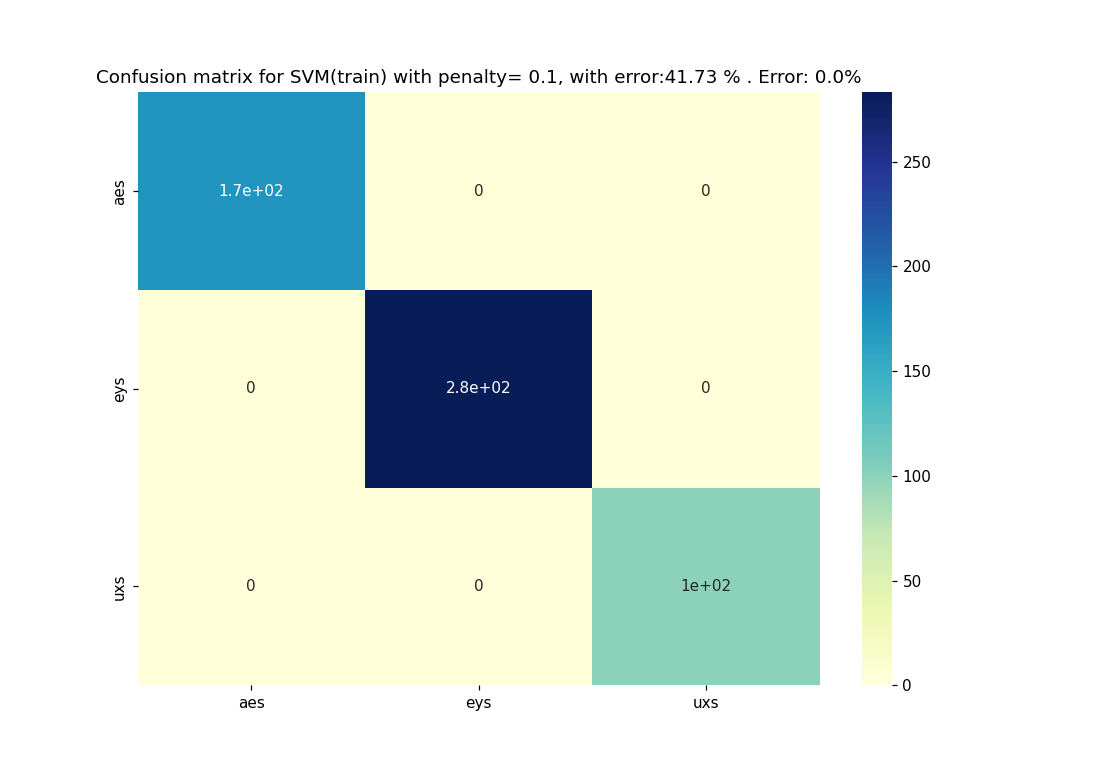

<IPython.core.display.Javascript object>


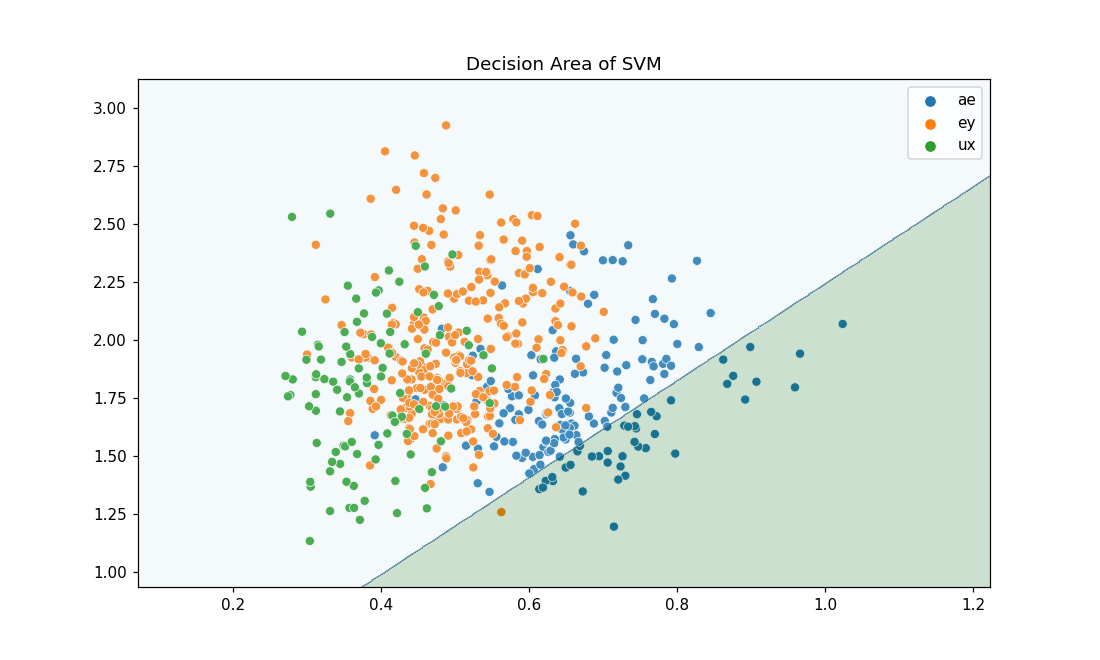

<IPython.core.display.Javascript object>


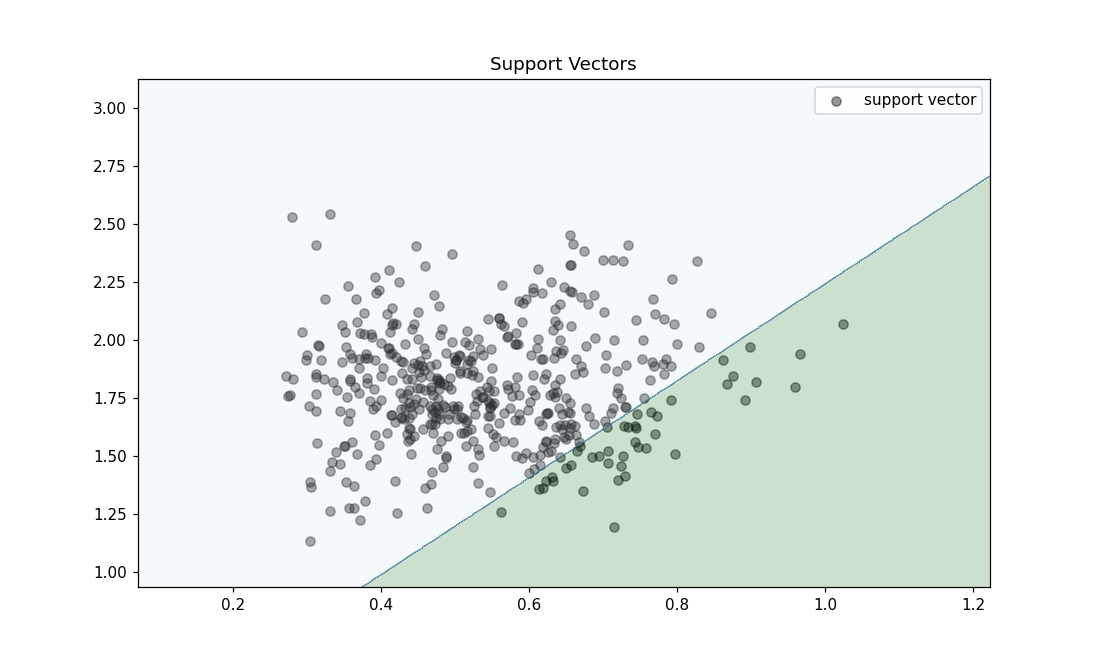

<IPython.core.display.Javascript object>


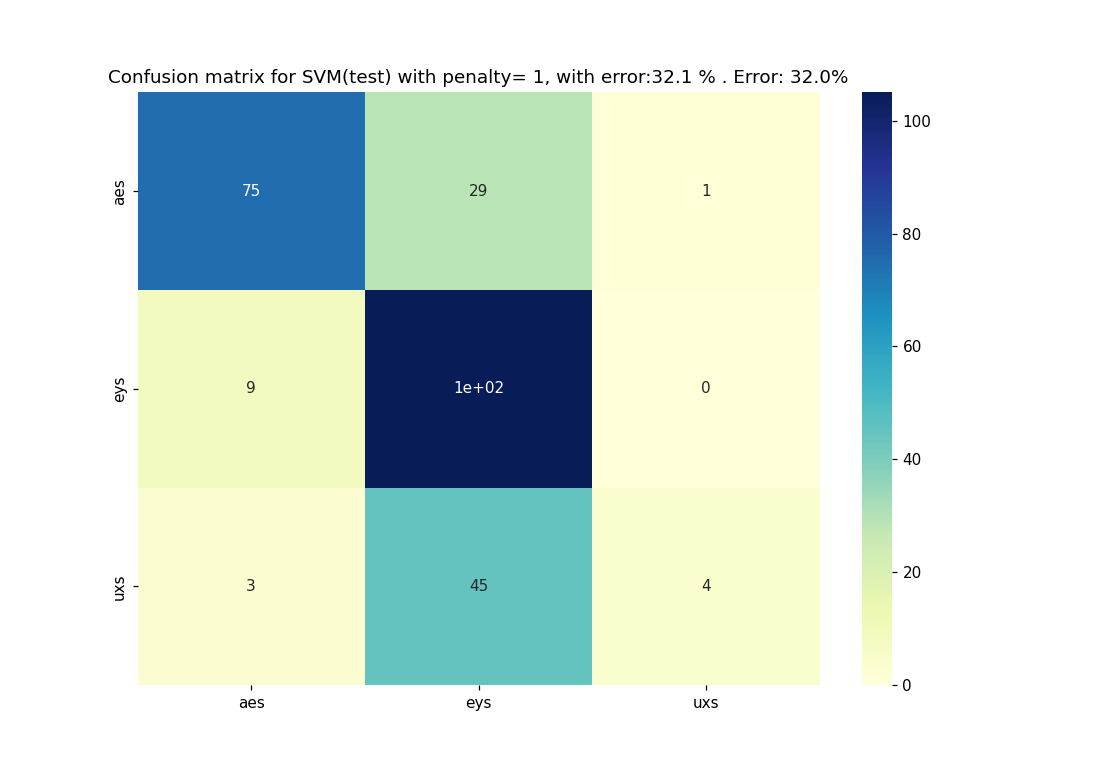

<IPython.core.display.Javascript object>


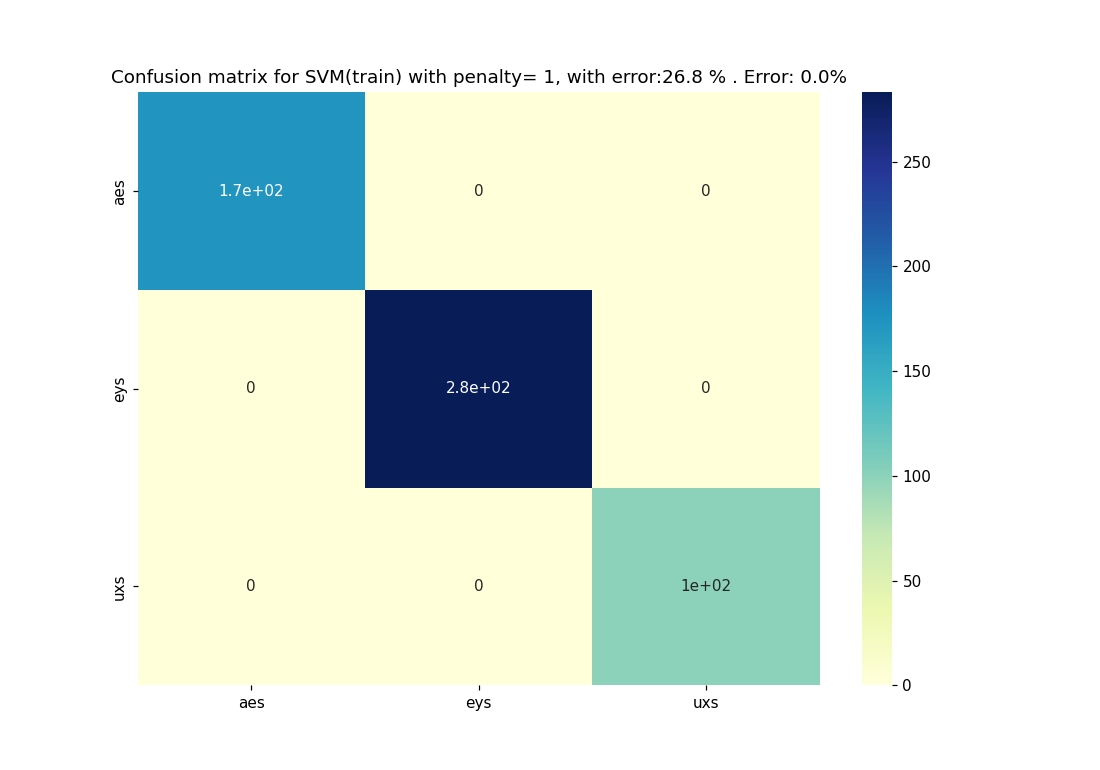

<IPython.core.display.Javascript object>


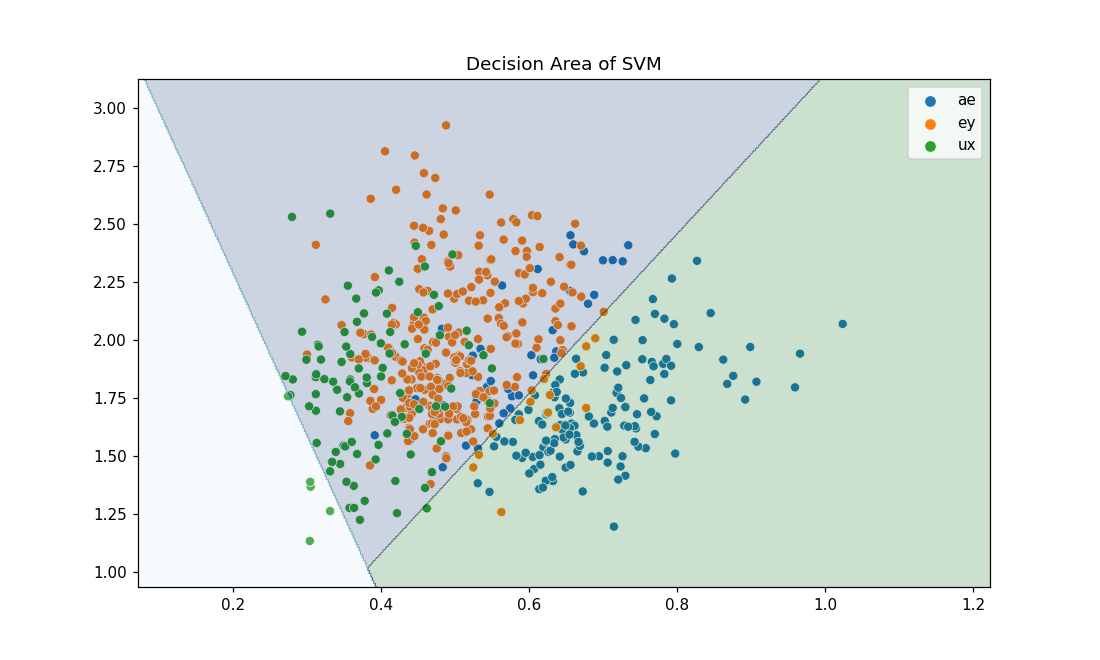

<IPython.core.display.Javascript object>


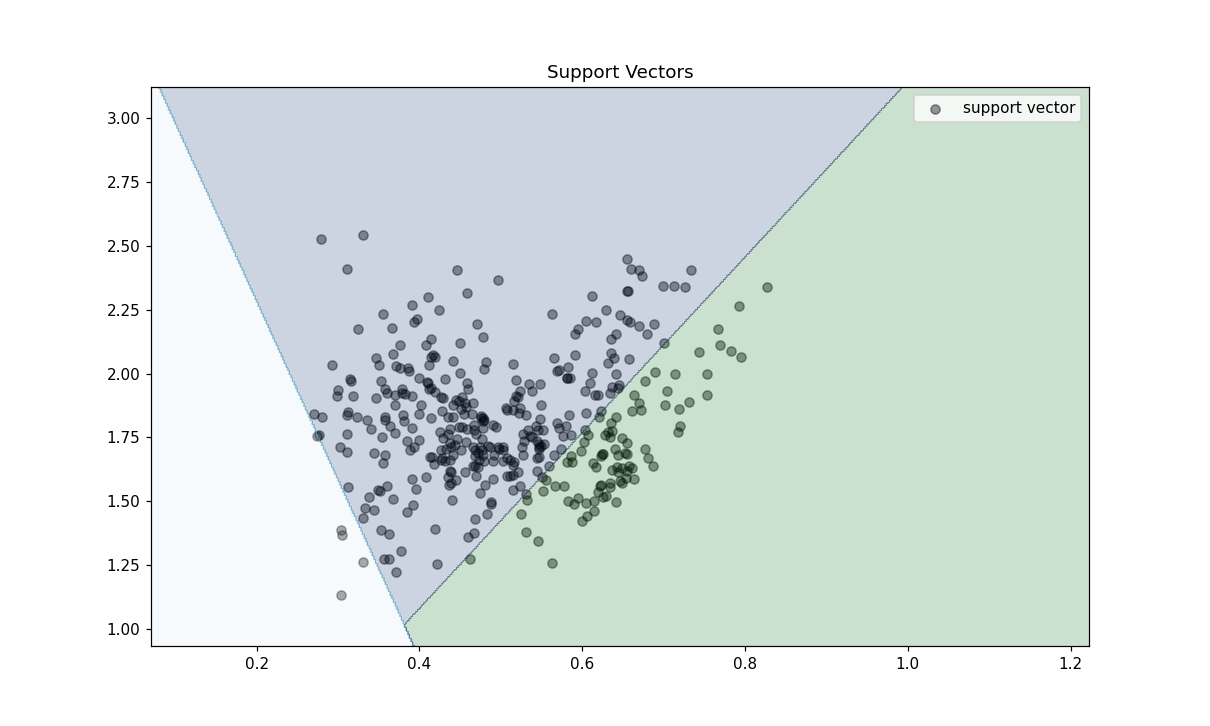

<IPython.core.display.Javascript object>


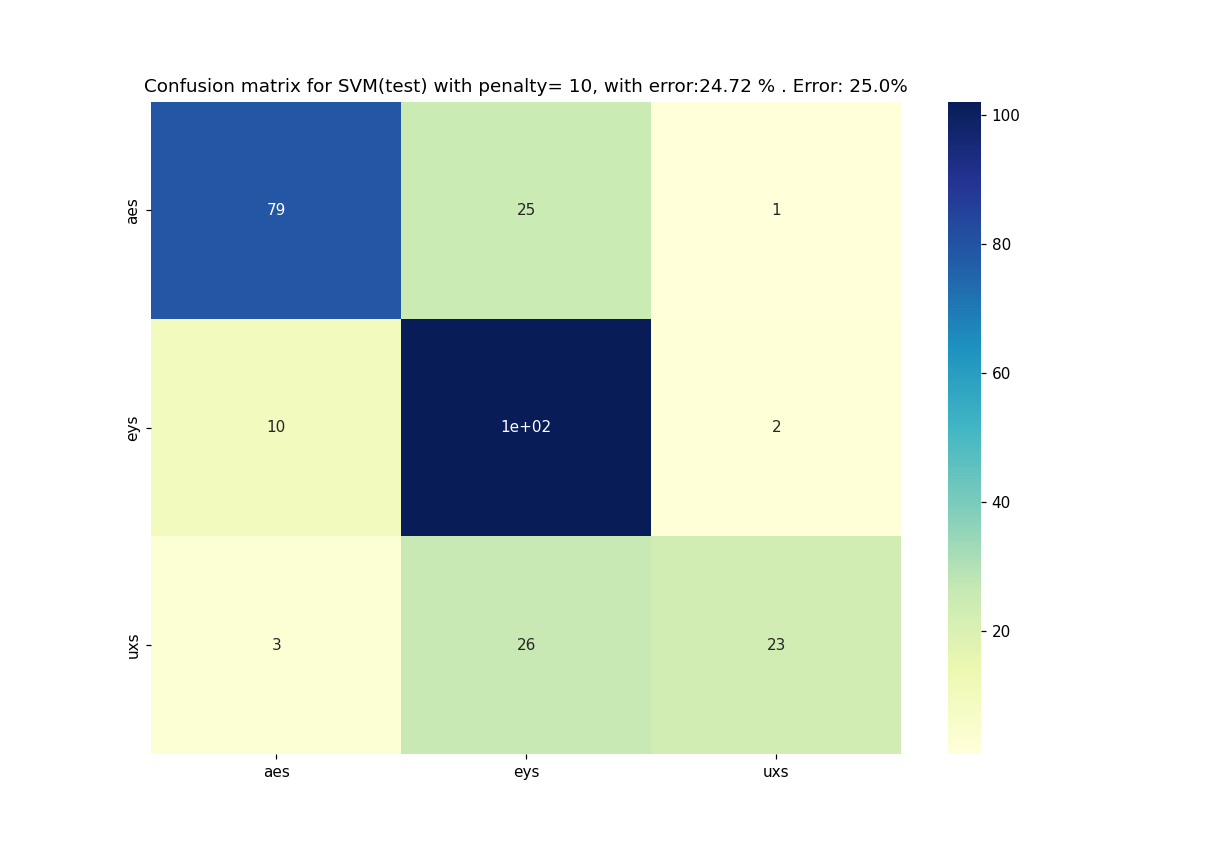

<IPython.core.display.Javascript object>


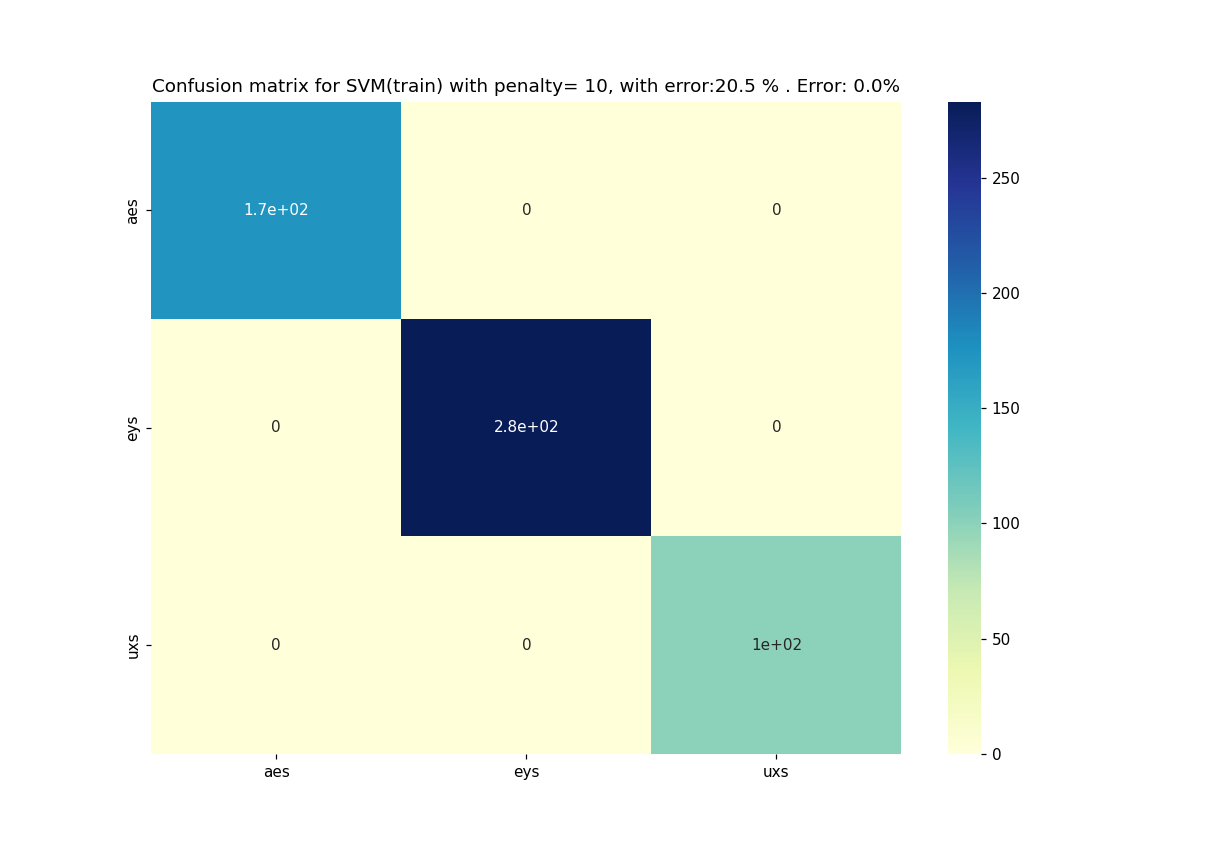

<IPython.core.display.Javascript object>


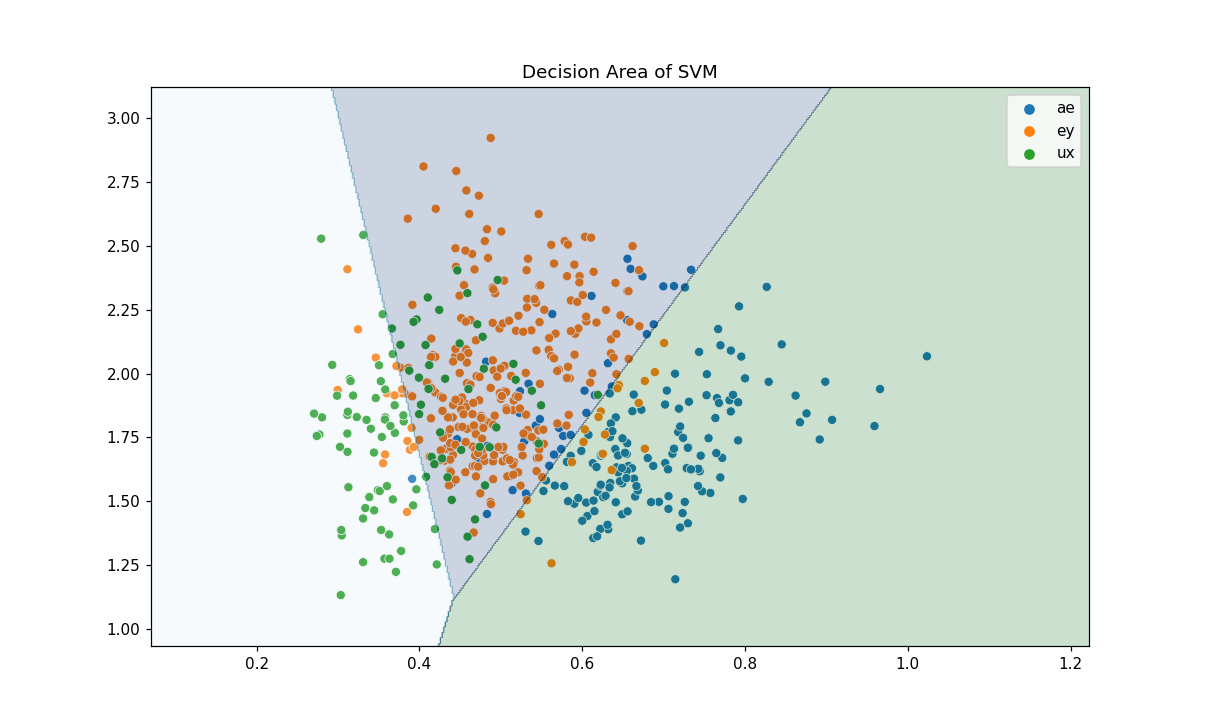

<IPython.core.display.Javascript object>


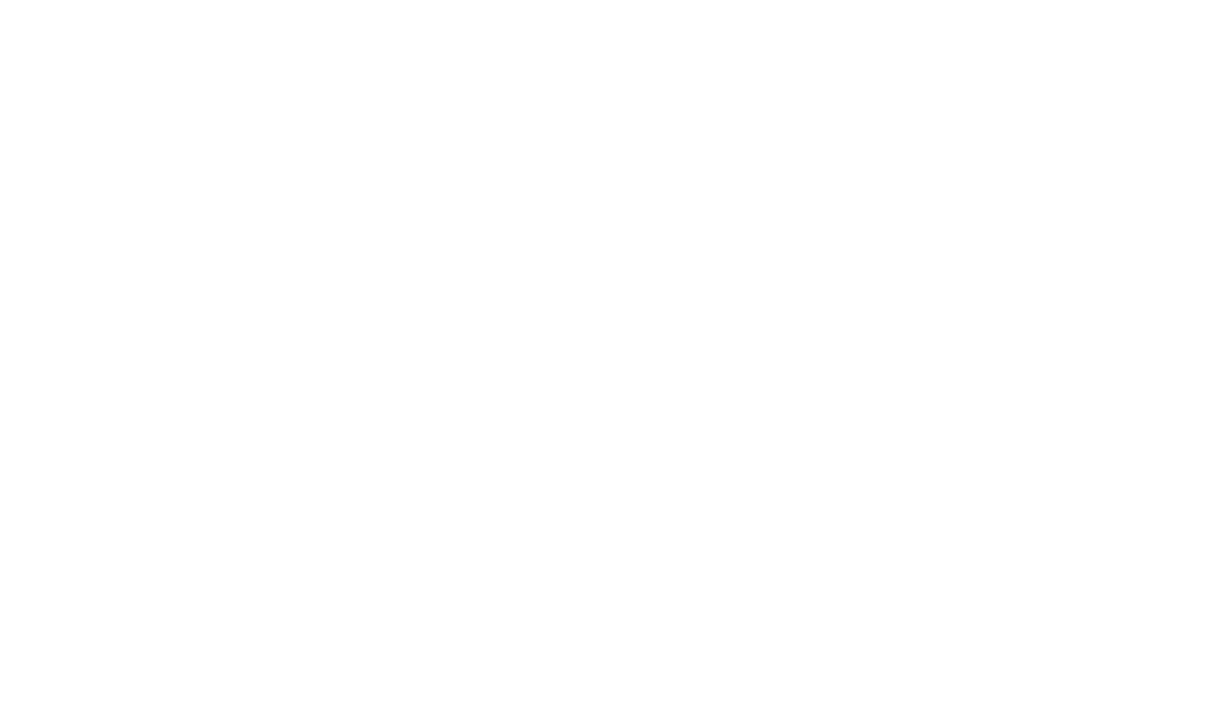

In [150]:
#plotting of SVM decision regions and support vectors in 2D.
aes_train = train[train['Phoneme'] == 'ae'].loc[:,['F1','F2']]
eys_train = train[train['Phoneme'] == 'ey'].loc[:,['F1','F2']]
uxs_train = train[train['Phoneme'] == 'ux'].loc[:,['F1','F2']]
train_phonemes = np.vstack((aes_train, eys_train, uxs_train))

aes_test_feat = test[test['Phoneme'] == 'ae'].loc[:,['F1','F2']]
eys_test_feat = test[test['Phoneme'] == 'ey'].loc[:,['F1','F2']]
uxs_test_feat = test[test['Phoneme'] == 'ux'].loc[:,['F1','F2']]
test_phonemes = np.vstack((aes_test_feat, eys_test_feat, uxs_test_feat))

#labels


#Trainlabels = np.array(aes_train.shape[0]*["ae"] + eys_train.shape[0]*["ey"] + uxs_train.shape[0]*["ux"])
#print(type(aes_train.shape[0]*["ae"]))
train_labels = np.concatenate((aes['Phoneme'].values,eys['Phoneme'].values,uxs['Phoneme'].values))

test_labels = np.concatenate((aes_test['Phoneme'].values,eys_test['Phoneme'].values,uxs_test['Phoneme'].values))
C = [0.1,1,10]
clf1 = SVM(train_phonemes, test_phonemes, train_labels, test_labels, C, class_names,plot_cm=True, plot_dec_sup=True)
#sklearnPlotSupportVector(clf, train_phonemes)

(b) Try different kernels ('rbf', 'poly', 'sigmoid') and compare the results. Choose one of the kernels and use different penalty terms $C$. What happens with the performance on the training set when you increase $C$? What happens with the performance on the test set?

<IPython.core.display.Javascript object>


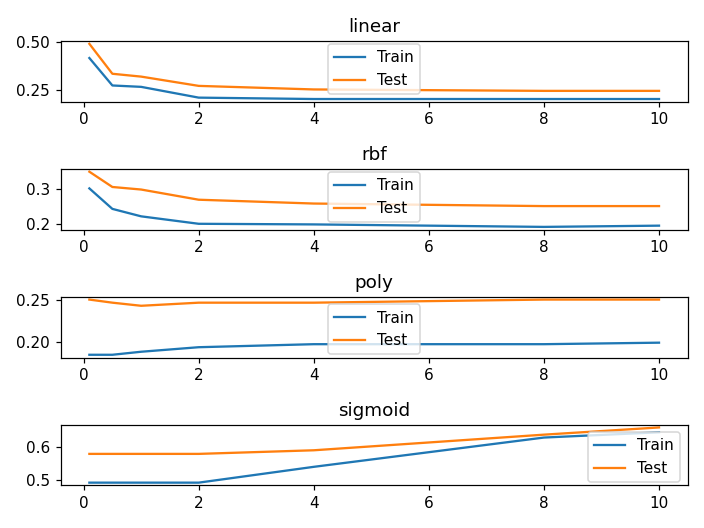

In [160]:
#for some reason it plots this in the wrong window.

plt.cla()
plt.clf()
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
fig, axs = plt.subplots(len(kernels))
C = [0.1, 0.5, 1, 2, 4, 8, 10]
for idx, kernel in enumerate(kernels):
    train_error, test_error = [], []
    for p in C:
        clf = svm.SVC(C=p, kernel=kernel)
        clf.fit(train_phonemes, train_labels)
        train_labels_pred = clf.predict(train_phonemes)
        test_labels_pred = clf.predict(test_phonemes)
        
        error_train = np.sum(train_labels != train_labels_pred)
        train_error.append(error_train/len(train_labels_pred)) #normalizing
        error_test = np.sum(test_labels != test_labels_pred)
        test_error.append(error_test/len(test_labels_pred))
    
    axs[idx].plot(C, train_error, label='Train')
    axs[idx].plot(C, test_error, label='Test')
    axs[idx].set_title(kernel)
    #axs[idx].title(f'Kernel type: {kernel}')
    axs[idx].legend()
    fig.tight_layout()
    